In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('/Users/Dennis/data_science/toydata/SALES_0615.csv',encoding = 'big5')
df.head(5)

,訂單號碼,業務員代號,業務員,客戶代號,客層,客戶姓名,Order Dt,Closed Dt,Status,Country,...,Prod Line,Product,Prod No,Price,Qty,Disc Prcnt,Prod Cost,毛利,amount,月份
0,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,...,西裝,StarDome,40103,554,1,19,410,38.74,448.74,8
1,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,...,褲子,運動褲,40303,25,25,8,16,175.00,575.00,8
2,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,...,內褲,GO Water Bottle,50203,8,32,14,4,92.16,220.16,8
3,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,...,再生用品,EnviroSak,60200,7,16,1,2,78.88,110.88,8
4,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,...,再生用品,Enviro-Kit,60201,13,19,24,4,111.72,187.72,8


## 簡單EDA一下

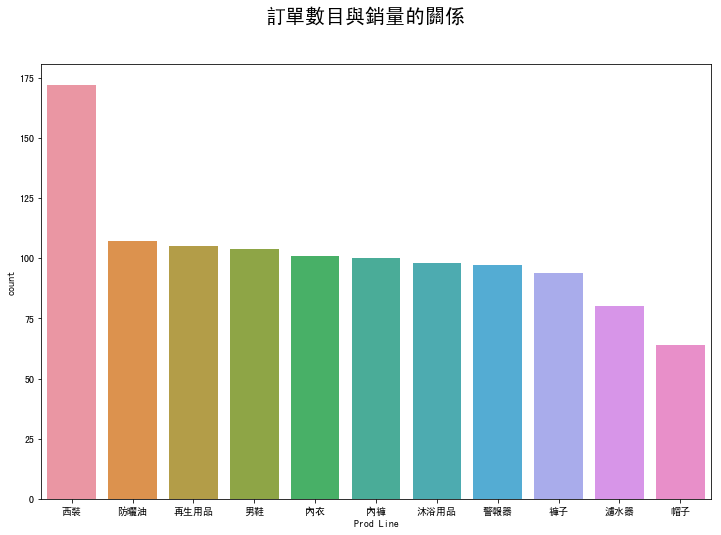

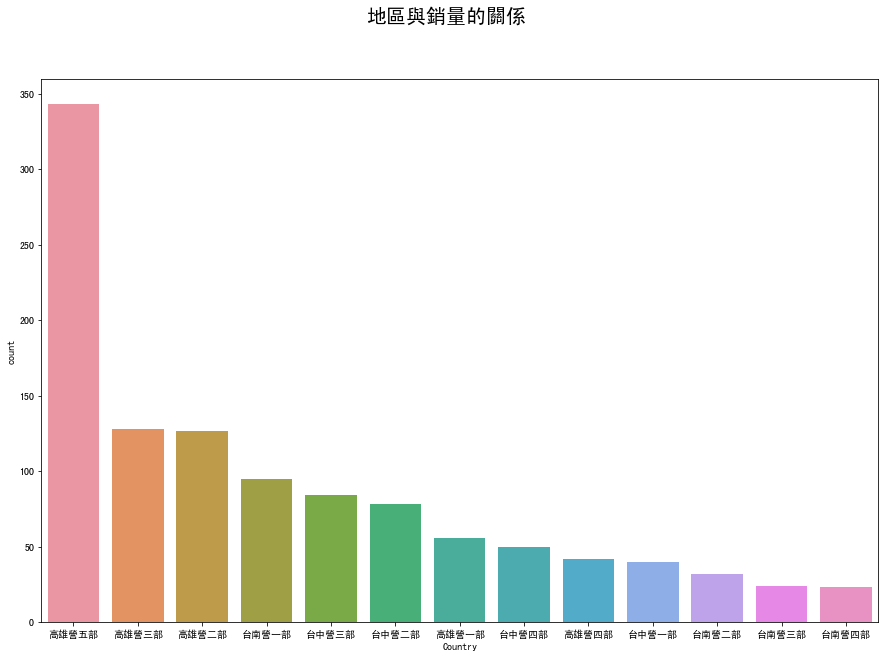

In [94]:
plt.figure(figsize = (12, 8 ))
plt.suptitle('訂單數目與銷量的關係' ,fontsize = 20)
sns.countplot(x = df['Prod Line'] ,order = df['Prod Line'].value_counts().index)
plt.figure(figsize = (15, 10 ))
plt.suptitle('地區與銷量的關係',fontsize = 20)
sns.countplot(x = df['Country'] ,order = df['Country'].value_counts().index)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


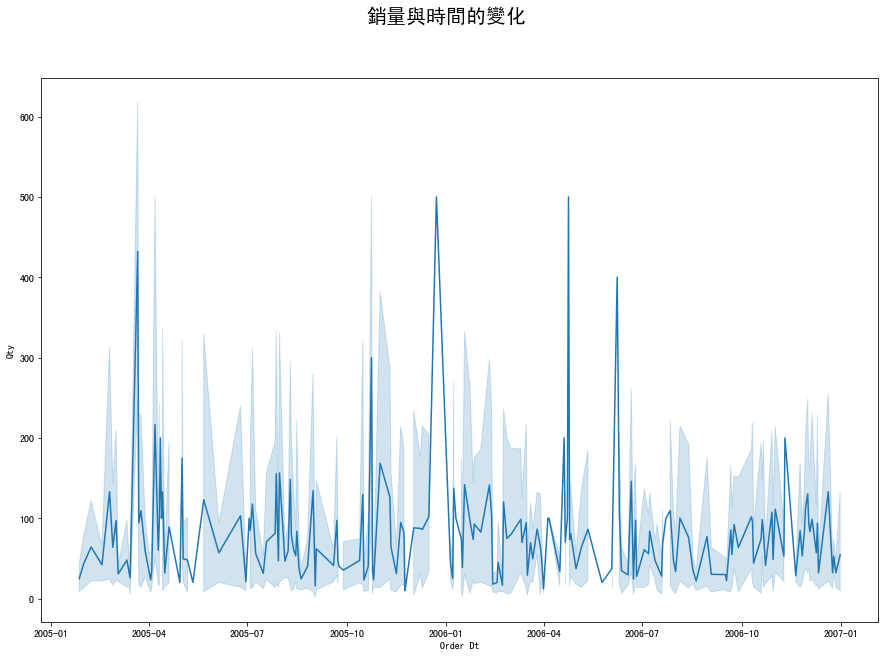

In [55]:
df['Order Dt'] = pd.to_datetime(df['Order Dt'])
plt.figure(figsize = (15,10))
plt.suptitle('銷量與時間的變化' , fontsize = 20)
sns.lineplot(x = df['Order Dt'] , y  = df.Qty , data = df)

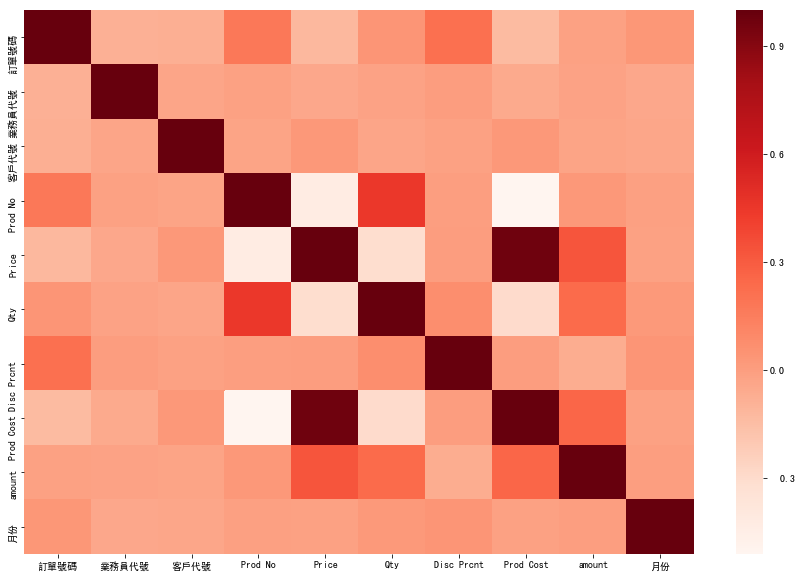

In [40]:
cor_X = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor_X ,cmap= plt.cm.Reds)

In [43]:
target_feature  = abs(cor_X['amount'])
relative_feature = target_feature[target_feature > 0.1]
print(relative_feature)

Price        0.327799
Qty          0.240981
Prod Cost    0.256885
amount       1.000000
Name: amount, dtype: float64


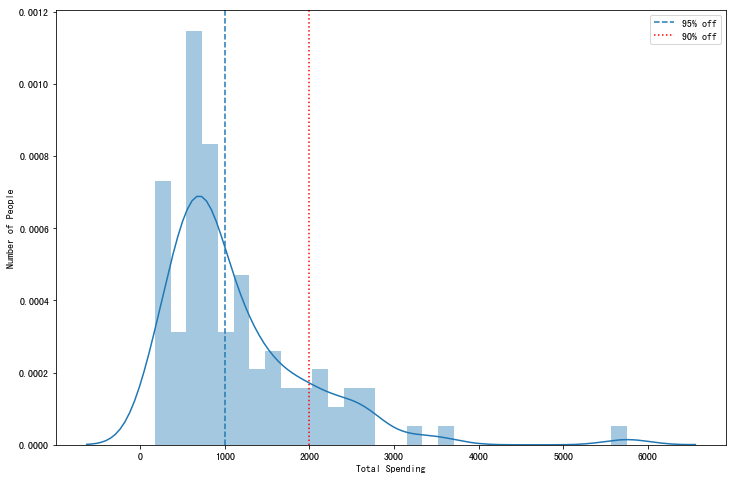

In [50]:
d_price = df.groupby("客戶代號")['Price'].sum()
dt = pd.DataFrame([d_price.index,d_price.values]).T
dt.columns = ['ID' , "total_price"]
spending = d_price.values.tolist()
# splot = sns.distplot(spending,bins = 30,norm_hist = False,kde=False)
# splot.set(xticks=np.arange(0,1501,100),yticks=np.arange(0,4001,500),
#           xlabel = 'Total Spending',ylabel = 'Number of People')
fig,ax1 = plt.subplots(figsize = (12,8))
splot = sns.distplot(spending,bins = 30,)
splot.set(xlabel = 'Total Spending',ylabel = 'Number of People')
ax1.axvline(x=1000, label='95% off', linestyle='--')
ax1.axvline(x=2000, label='90% off', linestyle=':',color ='r')
ax1.legend()

定價可以訂在800 , 1200元左右刺激消費

In [14]:
ls_num  = list(df.訂單號碼)
value = list(df['Prod Line'])
data = pd.DataFrame({'id':ls_num,'value':value})
data1 = data.groupby(by='id')['value'].sum()

In [15]:
from jieba import cut
import jieba
jieba.add_word('內衣')
jieba.add_word('警報器')
jieba.add_word('濾水器')
jieba.add_word('防曬油')
jieba.add_word('沐浴用品')
jieba.add_word('再生用品')
cato = []
for data in data1:
    this_cato = []
    s = ','.join(cut(data)).split(',')
    cato.append(s)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/rc/hx9rpq_n1wqgzz42y5z82qjc0000gr/T/jieba.cache
Loading model cost 0.849 seconds.
Prefix dict has been built succesfully.


In [16]:
cato

[['防曬油', '防曬油'],
 ['西裝', '西裝', '褲子', '內衣', '警報器', '防曬油'],
 ['西裝', '西裝', '西裝', '西裝', '內褲', '沐浴用品', '防曬油'],
 ['西裝', '西裝', '西裝', '內衣', '內衣', '警報器', '再生用品', '濾水器', '濾水器'],
 ['西裝', '內褲', '警報器', '防曬油'],
 ['西裝', '帽子', '男鞋', '內衣', '警報器', '防曬油'],
 ['西裝', '西裝', '西裝', '內衣', '沐浴用品', '防曬油'],
 ['西裝', '男鞋', '內褲', '沐浴用品', '濾水器'],
 ['帽子', '男鞋', '男鞋', '內褲', '沐浴用品', '濾水器'],
 ['西裝', '西裝', '褲子', '內衣', '警報器', '防曬油'],
 ['褲子', '男鞋', '男鞋', '內衣', '警報器', '沐浴用品'],
 ['帽子', '帽子', '褲子', '內衣', '再生用品', '沐浴用品'],
 ['西裝', '褲子', '褲子', '內衣', '警報器', '再生用品'],
 ['西裝', '西裝', '西裝', '西裝', '西裝', '褲子', '褲子', '內褲', '再生用品'],
 ['西裝', '帽子', '褲子', '內衣', '防曬油', '防曬油'],
 ['西裝', '西裝', '西裝', '西裝', '男鞋', '內褲', '防曬油', '濾水器'],
 ['西裝', '褲子', '男鞋', '內衣', '再生用品', '防曬油'],
 ['西裝', '西裝', '褲子', '內褲', '再生用品', '防曬油'],
 ['西裝', '男鞋', '男鞋', '內衣', '再生用品', '防曬油'],
 ['西裝', '帽子', '男鞋', '內衣', '警報器', '濾水器'],
 ['西裝', '男鞋', '男鞋', '內衣', '再生用品', '沐浴用品'],
 ['褲子', '男鞋', '男鞋', '內褲', '再生用品', '防曬油'],
 ['西裝', '男鞋', '內衣', '再生用品', '沐浴用品'],
 ['西裝', '帽子', '褲子', '內衣', '警報器',

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = cato
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.tail()

,內衣,內褲,再生用品,帽子,沐浴用品,濾水器,男鞋,褲子,西裝,警報器,防曬油
217,False,False,False,False,False,True,False,False,False,False,False
218,True,False,False,False,False,False,False,False,False,False,False
219,True,False,False,False,False,False,False,False,False,False,False
220,False,False,False,False,False,True,False,False,False,False,False
221,False,False,False,False,False,True,False,False,False,False,False


In [18]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.2,use_colnames=True)

,support,itemsets
0,0.450450,(內衣)
1,0.450450,(內褲)
2,0.423423,(再生用品)
3,0.270270,(帽子)
4,0.400901,(沐浴用品)
5,0.324324,(濾水器)
6,0.396396,(男鞋)
7,0.382883,(褲子)
8,0.576577,(西裝)
9,0.396396,(警報器)


In [19]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.450450,(內衣),1
1,0.450450,(內褲),1
2,0.423423,(再生用品),1
3,0.270270,(帽子),1
4,0.400901,(沐浴用品),1
5,0.324324,(濾水器),1
6,0.396396,(男鞋),1
7,0.382883,(褲子),1
8,0.576577,(西裝),1
9,0.396396,(警報器),1


In [20]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7) #min_threshold代表最低置信度
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)

support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

  antecedents consequents  antecedent support  consequent support   support  \
0      (再生用品)        (內褲)            0.423423            0.450450  0.234234   
1        (內褲)      (再生用品)            0.450450            0.423423  0.234234   
2        (男鞋)        (內褲)            0.396396            0.450450  0.225225   
3        (內褲)        (男鞋)            0.450450            0.396396  0.225225   
4       (警報器)        (內褲)            0.396396            0.450450  0.220721   
5        (內褲)       (警報器)            0.450450            0.396396  0.220721   
6      (再生用品)        (褲子)            0.423423            0.382883  0.202703   
7        (褲子)      (再生用品)            0.382883            0.423423  0.202703   
8        (男鞋)      (沐浴用品)            0.396396            0.400901  0.207207   
9      (沐浴用品)        (男鞋)            0.400901            0.396396  0.207207   

   confidence      lift  leverage  conviction  
0    0.553191  1.228085  0.043503    1.229944  
1    0.520000  1.228085  0.043503 

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [21]:
rules.sort_values(by = 'confidence',ascending=False) #.sort_values(by = 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(男鞋),(內褲),0.396396,0.450450,0.225225,0.568182,1.261364,0.046668,1.272641
4,(警報器),(內褲),0.396396,0.450450,0.220721,0.556818,1.236136,0.042164,1.240009
0,(再生用品),(內褲),0.423423,0.450450,0.234234,0.553191,1.228085,0.043503,1.229944
7,(褲子),(再生用品),0.382883,0.423423,0.202703,0.529412,1.250313,0.040581,1.225225
8,(男鞋),(沐浴用品),0.396396,0.400901,0.207207,0.522727,1.303882,0.048292,1.255255
1,(內褲),(再生用品),0.450450,0.423423,0.234234,0.520000,1.228085,0.043503,1.201201
9,(沐浴用品),(男鞋),0.400901,0.396396,0.207207,0.516854,1.303882,0.048292,1.249319
3,(內褲),(男鞋),0.450450,0.396396,0.225225,0.500000,1.261364,0.046668,1.207207
5,(內褲),(警報器),0.450450,0.396396,0.220721,0.490000,1.236136,0.042164,1.183536
6,(再生用品),(褲子),0.423423,0.382883,0.202703,0.478723,1.250313,0.040581,1.183857


這裡的相關性：
1. 買了男鞋可能就會買內褲
2. 買了警報器也會買內褲
3. 買了褲子 >> 再生用品

## 看看哪些商品賣得比較好

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

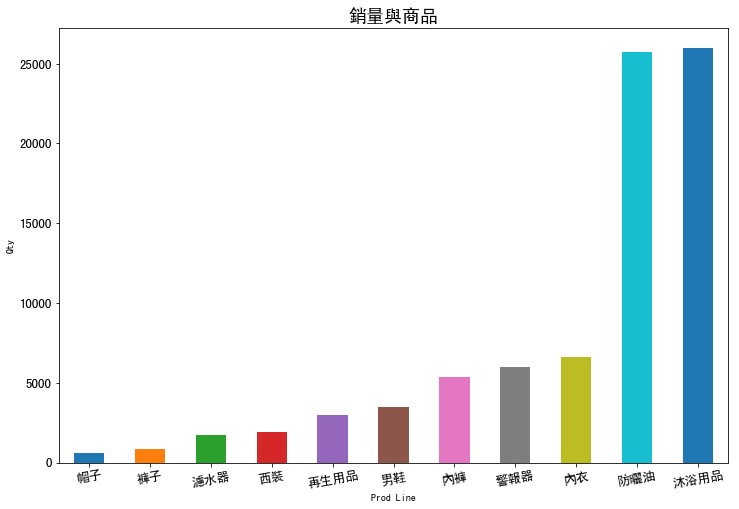

In [128]:
plt.figure(figsize = (12,8))
qty = df.groupby(df['Prod Line'])['Qty'].sum()
plt.ylabel('Qty')
qty.sort_values().plot(kind = 'bar' , fontsize = 13)
plt.title('銷量與商品' , fontsize = 18)
plt.xticks(rotation = 10)

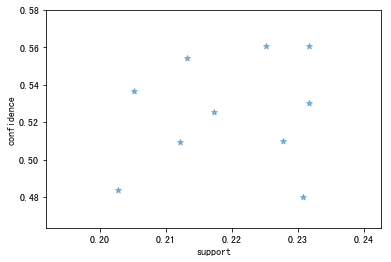

In [33]:
import random
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

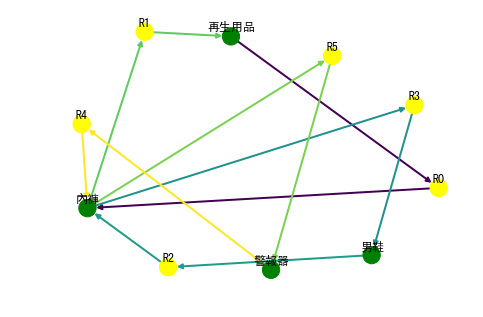

In [23]:
import networkx as nx  
def draw_graph(rules, rules_to_show):

  G1 = nx.DiGraph()
  
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
  
  
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
   
    
    for a in rules.iloc[i]['antecedents']:
               
        G1.add_nodes_from([a])
       
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
      
    for c in rules.iloc[i]['consequents']:
            
            G1.add_nodes_from([c])
           
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       


  
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]

  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
  
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

    
draw_graph (rules, 6)   


In [24]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# dataset = []
# for i in range( 0 ,df.shape[0]):
#     dataset.append([str(df.values[i,j]) for j in range(0,df.shape[1])])
dataset = cato
oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df       
 
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
#print (frequent_itemsets)
 
# association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
# print (rules)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 11 columns):
內衣      222 non-null bool
內褲      222 non-null bool
再生用品    222 non-null bool
帽子      222 non-null bool
沐浴用品    222 non-null bool
濾水器     222 non-null bool
男鞋      222 non-null bool
褲子      222 non-null bool
西裝      222 non-null bool
警報器     222 non-null bool
防曬油     222 non-null bool
dtypes: bool(11)
memory usage: 2.5 KB


In [ ]:
df['毛利'] = pd.to_datetime(df['毛利'])
plt.figure(figsize = (15,10))
plt.suptitle('毛利與時間的變化' , fontsize = 20)
sns.lineplot(x = df['Order Dt'] , y  = df.amount , data = df )

In [ ]:
df.corr()

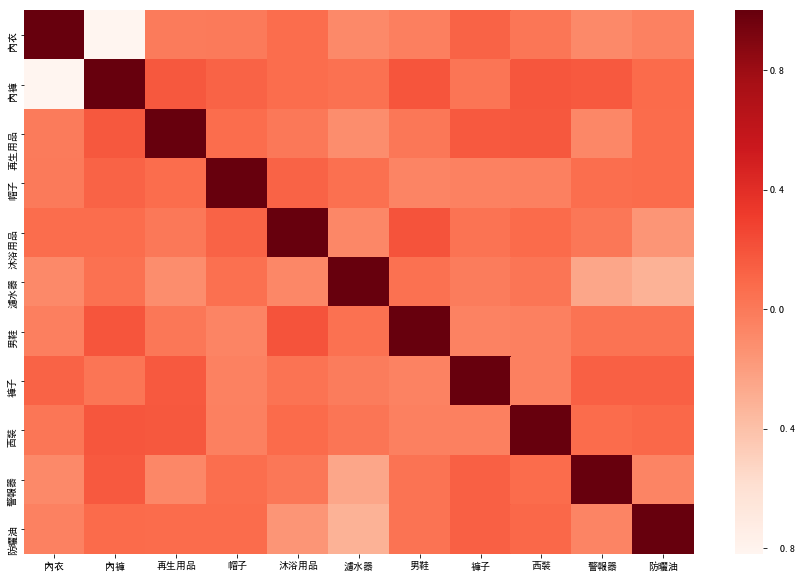

In [26]:
cor_X = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor_X ,cmap= plt.cm.Reds)